In [1]:
x = {1:1}
x.pop(1)

1

In [3]:
from database import *
from pathlib import Path
workdb = WorkDB()

id_list = workdb.get_all_id()
id_list = sorted(id_list)
for id in id_list:
    a = workdb.get_all_epoch(id)
    print(id, a)

korean_abi_rec_v1 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [2]:
import json

json.loads("""{'character': '지정', 'first': '자자', 'second': '이어', 'third': '으응'}""".replace("'", '"'))

{'character': '지정', 'first': '자자', 'second': '이어', 'third': '으응'}

In [12]:
import h5py
import numpy as np
from pathlib import Path

# Path("/home/dataset_cache.h5").unlink()
cache_file = "/home/dataset_cache.h5"
# HDF5 파일에 샘플 데이터 저장
def save_dict_to_hdf5(group, data):
    for key, value in data.items():
        if isinstance(value, dict):
            subgroup = group.create_group(key)
            save_dict_to_hdf5(subgroup, value)
        else:
            if isinstance(value, np.ndarray) and value.dtype.type is np.str_:
                dt = h5py.special_dtype(vlen=str)
                group.create_dataset(key, data=value.astype(dt))
            else:
                group.create_dataset(key, data=value)

def save_samples_to_hdf5(data_sample, sample_key, filename = cache_file):
    with h5py.File(filename, 'a') as f:
        if sample_key in f:
            return
        group = f.create_group(sample_key)
        save_dict_to_hdf5(group, data_sample)

# HDF5 파일에서 샘플 데이터 로드
def load_dict_from_hdf5(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = load_dict_from_hdf5(group[key])
        else:
            dataset = group[key]
            if dataset.shape == ():  # 스칼라 데이터셋
                value = dataset[()]
            else:
                value = dataset[:]
                if isinstance(value, np.ndarray) and value.dtype.type is np.bytes_:
                    value = value.astype(str)
            data[key] = value
    return data

def load_samples_from_hdf5(sample_key, filename = cache_file):
    with h5py.File(filename, 'r') as f:
        sample = load_dict_from_hdf5(f[sample_key])
    return sample

# 사용 예
data_sample1 = {
    'images': np.random.rand(64, 64, 3),
    'labels': np.array(0),
    'metadata': {
        'info': np.array(['sample1'], dtype='S'),
        'date': np.array(['2024-06-19'], dtype='S')
    }
}

data_sample2 = {
    'images': np.random.rand(64, 64, 3),
    'labels': np.array(1),
    'metadata': {
        'info': np.array(['sample2'], dtype='S'),
        'date': np.array(['2024-06-20'], dtype='S'),
        "a":{"a":1}
    }
}

# 샘플 데이터 저장
save_samples_to_hdf5(data_sample1, 'key_3')
save_samples_to_hdf5(data_sample2, 'key_4')

# 샘플 데이터 로드
loaded_sample1 = load_samples_from_hdf5('key_3')
loaded_sample2 = load_samples_from_hdf5('key_4')

# 로드된 데이터 출력
print("Loaded Sample 1:")
for key, value in loaded_sample1.items():
    print(f"  {key}: {value.shape if isinstance(value, np.ndarray) else value}")

print("\nLoaded Sample 2:")
for key, value in loaded_sample2.items():
    print(f"  {key}: {value.shape if isinstance(value, np.ndarray) else value}")



Loaded Sample 1:
  images: (64, 64, 3)
  labels: 0
  metadata: {'date': array(['2024-06-19'], dtype='<U10'), 'info': array(['sample1'], dtype='<U7')}

Loaded Sample 2:
  images: (64, 64, 3)
  labels: 1
  metadata: {'a': {'a': 1}, 'date': array(['2024-06-20'], dtype='<U10'), 'info': array(['sample2'], dtype='<U7')}


In [2]:
import os
import numpy as np

os.chdir("/home/code/PaddleOCR/ppocr")


from utils.dataset_cache import save_samples_to_hdf5, load_samples_from_hdf5



data_sample1 = {
    'images': np.random.rand(64, 64, 3),
    'labels': np.array(0),
    'metadata': {
        'info': np.array(['sample1'], dtype='S'),
        'date': np.array(['2024-06-19'], dtype='S')
    }
}

data_sample2 = {
    'images': np.random.rand(64, 64, 3),
    'labels': np.array(1),
    'metadata': {
        'info': np.array(['sample2'], dtype='S'),
        'date': np.array(['2024-06-20'], dtype='S'),
        "a":{"a":1}
    }
}


# 샘플 데이터 저장
save_samples_to_hdf5(data_sample1, 'key_1')
save_samples_to_hdf5(data_sample2, 'key_2')

# 샘플 데이터 로드
loaded_sample1 = load_samples_from_hdf5('key_1')
loaded_sample2 = load_samples_from_hdf5('key_2')

# 로드된 데이터 출력
print("Loaded Sample 1:")
for key, value in loaded_sample1.items():
    print(f"  {key}: {value.shape if isinstance(value, np.ndarray) else value}")

print("\nLoaded Sample 2:")
for key, value in loaded_sample2.items():
    print(f"  {key}: {value.shape if isinstance(value, np.ndarray) else value}")


Loaded Sample 1:
  images: (64, 64, 3)
  labels: 0
  metadata: {'date': array(['2024-06-19'], dtype='<U10'), 'info': array(['sample1'], dtype='<U7')}

Loaded Sample 2:
  images: (64, 64, 3)
  labels: 1
  metadata: {'a': {'a': 1}, 'date': array(['2024-06-20'], dtype='<U10'), 'info': array(['sample2'], dtype='<U7')}


In [42]:
from math import e
import h5py
import numpy as np
from pathlib import Path
from filelock import FileLock

import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'


# Path("/home/dataset_cache.h5").unlink()
cache_file = "/home/dataset_cache.h5"
lock = FileLock(f"{cache_file}.lock", timeout=10)

# HDF5 파일에 샘플 데이터 저장
def save_dict_to_hdf5(group, data):
    for key, value in data.items():
        if isinstance(value, dict):
            subgroup = group.create_group(key)
            save_dict_to_hdf5(subgroup, value)
        else:
            if isinstance(value, np.ndarray) and value.dtype.type is np.str_:
                dt = h5py.special_dtype(vlen=str)
                group.create_dataset(key, data=value.astype(dt))
            else:
                group.create_dataset(key, data=value)

def save_samples_to_hdf5(data_sample, sample_key, filename = cache_file):
    while True:
        try:
            with lock:
                with h5py.File(filename, 'a') as f:
                    if sample_key in f:
                        return
                    group = f.create_group(sample_key)
                    save_dict_to_hdf5(group, data_sample)
                    f.flush()
                    fd = f.id.get_vfd_handle()  # 파일 기술자 가져오기
                    os.fsync(fd)  # 운영 체제 파일 시스템 버퍼 플러시
                break
        except BlockingIOError as e:
            continue

# # HDF5 파일에서 샘플 데이터 로드
# def load_dict_from_hdf5(group):
#     data = {}
#     for key in group.keys():
#         if isinstance(group[key], h5py.Group):
#             data[key] = load_dict_from_hdf5(group[key])
#         else:
#             dataset = group[key]
#             if dataset.shape == ():  # 스칼라 데이터셋
#                 value = dataset[()]
#             else:
#                 value = dataset[:]
#                 if isinstance(value, np.ndarray) and value.dtype.type is np.bytes_:
#                     value = value.astype(str)
#             data[key] = value
#     return data

def load_dict_from_hdf5(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = load_dict_from_hdf5(group[key])
        else:
            dataset = group[key]
            if dataset.shape == ():  # 스칼라 데이터셋
                value = dataset[()]
                if isinstance(value, (bytes, np.bytes_)):
                    value = value.decode('utf-8')  # 바이트를 문자열로 디코딩
            else:
                value = dataset[:]
                if isinstance(value, np.ndarray) and value.dtype.type is np.bytes_:
                    value = value.astype(str)
                elif isinstance(value, np.ndarray) and value.dtype.type is np.object_:
                    value = np.array([item.decode('utf-8') if isinstance(item, (bytes, np.bytes_)) else item for item in value])
            data[key] = value
    return data


def load_samples_from_hdf5(sample_key, filename = cache_file):
    if not Path(filename).exists():
        return None
    with h5py.File(filename, 'r') as f:
        if sample_key in f:
            return load_dict_from_hdf5(f[sample_key])
        else:
            return None


a = 0
with lock:
    with h5py.File(cache_file, 'r') as f:
        for key in f["datasets"]["aihub_rec"].keys():
            try:
                a  += len(f["datasets"]["aihub_rec"][key].keys())
            except:
                
                pass
            
            
a
# load_samples_from_hdf5("./datasets/aihub_rec/718/717116.png").keys()
# load_samples_from_hdf5("./datasets/aihub_rec/718/717116.png")["origin_label"]


421805

In [9]:
pip install FileLock

Note: you may need to restart the kernel to use updated packages.


In [11]:
def chunk_list(data, num_chunks):
    avg = len(data) / float(num_chunks)
    chunks = []
    last = 0.0

    while last < len(data):
        chunks.append(data[int(last):int(last + avg)])
        last += avg

    return chunks

chunk_list(list(range(100)), 4)[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [1]:
cache_setting = {
    'rdcc_nbytes': 1024**3*20,  # 1GB
    'rdcc_nslots': int(1e6),  # 1백만 슬롯
    'rdcc_w0': 0.5  # 조기 쓰기 비율
}

from math import e
import h5py
import numpy as np
from pathlib import Path
from filelock import FileLock

import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'


# Path("/home/dataset_cache.h5").unlink()
cache_file = "/home/dataset_cache.h5"
lock = FileLock(f"{cache_file}.lock", timeout=10)

# HDF5 파일에 샘플 데이터 저장
def save_dict_to_hdf5(group, data):
    for key, value in data.items():
        if isinstance(value, dict):
            subgroup = group.create_group(key)
            save_dict_to_hdf5(subgroup, value)
        else:
            if isinstance(value, np.ndarray) and value.dtype.type is np.str_:
                dt = h5py.special_dtype(vlen=str)
                group.create_dataset(key, data=value.astype(dt))
            else:
                group.create_dataset(key, data=value)

def save_samples_to_hdf5(data_sample, sample_key, filename = cache_file):
    while True:
        try:
            with lock:
                with h5py.File(filename, 'w', **cache_setting) as f:
                    if sample_key in f:
                        return
                    group = f.create_group(sample_key)
                    save_dict_to_hdf5(group, data_sample)
                    f.flush()
                    fd = f.id.get_vfd_handle()  # 파일 기술자 가져오기
                    os.fsync(fd)  # 운영 체제 파일 시스템 버퍼 플러시
                break
        except BlockingIOError as e:
            continue

# # HDF5 파일에서 샘플 데이터 로드
# def load_dict_from_hdf5(group):
#     data = {}
#     for key in group.keys():
#         if isinstance(group[key], h5py.Group):
#             data[key] = load_dict_from_hdf5(group[key])
#         else:
#             dataset = group[key]
#             if dataset.shape == ():  # 스칼라 데이터셋
#                 value = dataset[()]
#             else:
#                 value = dataset[:]
#                 if isinstance(value, np.ndarray) and value.dtype.type is np.bytes_:
#                     value = value.astype(str)
#             data[key] = value
#     return data

def load_dict_from_hdf5(group):
    data = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Group):
            data[key] = load_dict_from_hdf5(group[key])
        else:
            dataset = group[key]
            if dataset.shape == ():  # 스칼라 데이터셋
                value = dataset[()]
                if isinstance(value, (bytes, np.bytes_)):
                    value = value.decode('utf-8')  # 바이트를 문자열로 디코딩
            else:
                value = dataset[:]
                if isinstance(value, np.ndarray) and value.dtype.type is np.bytes_:
                    value = value.astype(str)
                elif isinstance(value, np.ndarray) and value.dtype.type is np.object_:
                    value = np.array([item.decode('utf-8') if isinstance(item, (bytes, np.bytes_)) else item for item in value])
            data[key] = value
    return data


def load_samples_from_hdf5(sample_key, filename = cache_file):
    if not Path(filename).exists():
        return None
    with h5py.File(filename, 'r') as f:
        if sample_key in f:
            while True:
                try:
                    return load_dict_from_hdf5(f[sample_key])
                except :
                    
                    continue
            
        else:
            return None


a = 0
with lock:
    with h5py.File(cache_file, 'r') as f:
        for key in f["datasets"]["aihub_rec"].keys():
            try:
                a  += len(f["datasets"]["aihub_rec"][key].keys())
            except BlockingIOError as e:
                pass
            
            
a
# load_samples_from_hdf5("./datasets/aihub_rec/718/717116.png").keys()
# load_samples_from_hdf5("./datasets/aihub_rec/718/717116.png")["origin_label"]


636448

In [5]:
import h5py

# h5py 라이브러리 버전 확인
print("h5py version:", h5py.__version__)

# 사용 중인 HDF5 라이브러리 버전 확인
print("HDF5 version:", h5py.version.hdf5_version)


h5py version: 3.8.0
HDF5 version: 1.12.2


In [9]:
x = {1, 2, 3}
y= {3, 4, 5}
z = {1, 3, 5}
a = [x, y, z]


import itertools
set(itertools.chain.from_iterable(a))

{1, 2, 3, 4, 5}

In [10]:
a = "sdf.pdparams"
a[:-8]

'sdf.'

In [2]:
import six
six.PY2

False

In [6]:
import cv2

cv2.IMREAD_IGNORE_ORIENTATION
cv2.IMREAD_COLOR

1

In [14]:
img_path = "/home/1.png"
import io
from PIL import Image

with open(img_path, 'r') as f:
    img = Image.open(f)
    
img

ValueError: Could not save to PNG for display

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1253x162>

In [40]:
import random
random.seed(10)
x = [i for i in range(10)]

random.sample(x, 3)

[9, 0, 6]

In [41]:
x = [1, 2]
x[2:]

[]

In [28]:
from PIL import Image

# img_path 변수는 이미지 파일의 경로를 가리킵니다.
img_path = "/home/1.png"

# 이미지 파일을 읽고 표시합니다.
with open(img_path, 'rb') as f:
    img = Image.open(f)
    # 파일을 열고 이미지 객체를 생성한 후 블록을 벗어납니다.

# 이미지 객체를 블록 밖에서 표시합니다.
img.show()

ValueError: Could not save to PNG for display

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1253x162>

In [46]:
from PIL import Image
import numpy as np
import time

start_time = time.time()
for i in range(1000):
    image = Image.open( "/home/1.png")
    image_array = np.array(image)
end_time = time.time()

print("PIL -> Numpy 변환 시간:", end_time - start_time)

PIL -> Numpy 변환 시간: 5.7822277545928955


In [60]:
from PIL import Image
Image.open("/home/1.png").size
1253*162

202986
280315

202986

In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
with open("/home/1.png", "rb") as f:
    b_img = f.read()
    
img = np.frombuffer(b_img, dtype="uint8")
print(img.size)
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

print(img.shape)
img = img[:, :, ::-1]
print(img.shape)

280315
(162, 1253, 3)
(162, 1253, 3)


In [61]:
import numpy as np
from PIL import Image
import io
import time

# Byte 데이터를 예시로 생성 (보통 네트워크나 파일에서 읽어옴)
with open("/home/1.png", 'rb') as f:
    img = f.read()

# 왜 두 버전이 다른지는 아직 잘 모르겠군

# 이유는 모르겠으나 byt
img = np.frombuffer(img, dtype='uint8')
ignore_orientation = True
print(img.size)
if ignore_orientation:
    img = cv2.imdecode(img, cv2.IMREAD_IGNORE_ORIENTATION |
                        cv2.IMREAD_COLOR)
else:
    img = cv2.imdecode(img, 1) # 여기서 1은 cv2.IMREAD_COLOR임
    
# 즉 위 조건문에서 차이는 cv2.IMREAD_IGNORE_ORIENTATION이게 있냐 없냐임

# if img is None:
#     return None
# if self.img_mode == 'GRAY':
#     img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# elif self.img_mode == 'RGB':
#     assert img.shape[2] == 3, 'invalid shape of image[%s]' % (img.shape)
#     img = img[:, :, ::-1]

# if self.channel_first:
#     img = img.transpose((2, 0, 1))

# data['image'] = img
# return data

280315


In [27]:
img_path = "/home/1.png"
import io
from PIL import Image

with open(img_path, 'rb') as f:
    img = Image.open(f)

img.show()

# buffer = io.BytesIO()
# img.save(buffer, format='PNG')  # 여기서 'JPEG'는 원하는 이미지 포맷에 맞게 변경 가능
#  buffer.seek(0)
#     buffer_data = buffer.read()
# buffer

ValueError: Could not save to PNG for display

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1253x162>

In [7]:


# 버퍼에 저장된 데이터를 가져오기 (선택 사항)
buffer.seek(0)
buffer_data = buffer.read()


ignore_orientation = False

if six.PY2: # 파이썬 버전 2를 사용한다면 
    assert type(img) is str and len(
        img) > 0, "invalid input 'img' in DecodeImage"
else: # 버전 3을 말하는 거겠지?
    assert type(img) is bytes and len(
        img) > 0, "invalid input 'img' in DecodeImage"
    
# 왜 두 버전이 다른지는 아직 잘 모르겠군
    
img = np.frombuffer(img, dtype='uint8')
if ignore_orientation:
    img = cv2.imdecode(img, cv2.IMREAD_IGNORE_ORIENTATION |
                        cv2.IMREAD_COLOR)
else:
    img = cv2.imdecode(img, 1) # 여기서 1은 cv2.IMREAD_COLOR임
# 즉 위 조건문에서 차이는 cv2.IMREAD_IGNORE_ORIENTATION이게 있냐 없냐임


AssertionError: invalid input 'img' in DecodeImage

In [8]:
with open("/home/test.txt", "a") as f:
    f.write("테스트")

In [110]:
x = list(range(10))
x

x[-1::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [115]:
x = eval("0.8")
type(x)
y = 1 + eval("x")

In [117]:
eval("{1:2}")

{1: 2}

In [18]:
from pathlib import Path
import json

path = Path("/home/datasets/rec_signboard1/label.txt")
target_path = Path("/home/datasets/rec_signboard1/label2.txt")

with open(path, "r") as f:
    lines = [line.rstrip("\n").split("\t") for line in f.readlines()]


for path, label in lines:
    label = json.loads(label)

    with open(target_path, "a+") as f:
        f.write(f"{path}\t{label['label']}\n")
    

In [4]:
import os
for root, dirs, files in os.walk('/home/works_간판'):
    # root: 현재 탐색 중인 디렉터리의 경로
    # dirs: 현재 디렉터리 내의 하위 디렉터리 목록
    # files: 현재 디렉터리 내의 파일 목록

    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files)
    break

Root: /home/works_간판
Directories: ['rec_PPOCR_full_auto_rotate_v2', 'rec_PPOCR_sangmu_and_outsourcing_final_v1', 'rec_PPOCR_sangmu_and_outsourcing_final_v1_k_fold_5_2', 'rec_PPOCR_sangmu_and_outsourcing_final_v1_k_fold_5_3', 'rec_PPOCR_sangmu_and_outsourcing_final_v2']
Files: []


In [5]:
import mmap

# 파일을 메모리에 매핑
with open('/home/example.txt', 'r+b') as f:
    mm = mmap.mmap(f.fileno(), 0)

    # 전체 파일 내용 읽기
    print(mm[:])  # b'Hello, World!' 출력

    # 메모리 매핑된 파일의 내용을 수정
    mm[-7:] = b'Python2'
    
    print(mm[:])  # b'Hello, Python!' 출력

    # 변경사항을 파일에 반영
    # mm.flush()

    # 메모리 매핑 해제
    mm.close()


b'Hello,Python4'
b'Hello,Python2'


In [1]:
import os



from pathlib import Path

Path(os.getcwd()).absolute()

PosixPath('/')

In [2]:
import os
os.chdir("/home/code/PaddleOCR/ppocr")
import paddle
paddle.tensor

ModuleNotFoundError: No module named 'paddle'

In [3]:
import numpy
def gaussian_blur(w, h):
    sigmaX = w / 2.
    sigmaY = h / 2.
    x = numpy.linspace(-(w / 2.), (w / 2.), w)
    y = numpy.linspace(-(h / 2.), (h / 2.), h)
    x, y = numpy.meshgrid(x, y)
    x /= numpy.sqrt(2.) * sigmaX
    y /= numpy.sqrt(2.) * sigmaY
    x2 = x ** 2
    y2 = y ** 2
    kernel = numpy.exp(- x2 - y2)
    return kernel

gaussian_blur(10, 10)

array([[0.36787944, 0.44822088, 0.51979489, 0.57375342, 0.60279818,
        0.60279818, 0.57375342, 0.51979489, 0.44822088, 0.36787944],
       [0.44822088, 0.54610814, 0.63331324, 0.69905581, 0.73444367,
        0.73444367, 0.69905581, 0.63331324, 0.54610814, 0.44822088],
       [0.51979489, 0.63331324, 0.73444367, 0.81068432, 0.85172308,
        0.85172308, 0.81068432, 0.73444367, 0.63331324, 0.51979489],
       [0.57375342, 0.69905581, 0.81068432, 0.89483932, 0.9401382 ,
        0.9401382 , 0.89483932, 0.81068432, 0.69905581, 0.57375342],
       [0.60279818, 0.73444367, 0.85172308, 0.9401382 , 0.98773022,
        0.98773022, 0.9401382 , 0.85172308, 0.73444367, 0.60279818],
       [0.60279818, 0.73444367, 0.85172308, 0.9401382 , 0.98773022,
        0.98773022, 0.9401382 , 0.85172308, 0.73444367, 0.60279818],
       [0.57375342, 0.69905581, 0.81068432, 0.89483932, 0.9401382 ,
        0.9401382 , 0.89483932, 0.81068432, 0.69905581, 0.57375342],
       [0.51979489, 0.63331324, 0.7344436

In [8]:
label_list = list("abc")
label_list.index("aab")

ValueError: 'aab' is not in list

In [ ]:
class BaseRecLabelEncode(object):
    """ Convert between text-label and text-index """

    def __init__(self,
                 max_text_length,
                 character_dict_path=None,
                 use_space_char=False,
                 lower=False):

        self.max_text_len = max_text_length
        self.beg_str = "sos"
        self.end_str = "eos"
        self.lower = lower

        if character_dict_path is None:
            logger = get_logger()
            logger.warning(
                "The character_dict_path is None, model can only recognize number and lower letters"
            )
            self.character_str = "0123456789abcdefghijklmnopqrstuvwxyz"
            dict_character = list(self.character_str)
            self.lower = True
        else:
            self.character_str = []
            with open(character_dict_path, "rb") as fin:
                lines = fin.readlines()
                for line in lines:
                    line = line.decode('utf-8').strip("\n").strip("\r\n")
                    self.character_str.append(line)
            if use_space_char:
                self.character_str.append(" ")
            dict_character = list(self.character_str)
        dict_character = self.add_special_char(dict_character)
        self.dict = {}
        for i, char in enumerate(dict_character):
            self.dict[char] = i
        self.character = dict_character

    def add_special_char(self, dict_character):
        return dict_character

    def encode2(self, text):
        for char in text:
            if char not in self.dict:
                return None
        text = [self.dict[char] for char in text]

    def encode(self, text):
        """convert text-label into text-index.
        input:
            text: text labels of each image. [batch_size]

        output:
            text: concatenated text index for CTCLoss.
                    [sum(text_lengths)] = [text_index_0 + text_index_1 + ... + text_index_(n - 1)]
            length: length of each text. [batch_size]
        """
        if len(text) == 0 or len(text) > self.max_text_len:
            return None
        if self.lower:
            text = text.lower()
        text_list = []
        for char in text:
            if char not in self.dict:
                logger = get_logger()
                logger.warning('{} is not in dict'.format(char))
                continue
            text_list.append(self.dict[char])
        if len(text_list) == 0:
            return None
        return text_list

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 그레이스케일 이미지 생성 (예: 100x100 픽셀, 값 범위 0-255)
def create_grayscale_image(width, height):
    # 0에서 255 사이의 임의의 값을 갖는 그레이스케일 이미지 생성
    grayscale_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)
    return grayscale_image

# 그레이스케일 이미지 생성
width, height = 100, 100
grayscale_img = create_grayscale_image(width, height)
grayscale_img.
# 이미지를 시각화
plt.figure(figsize=(5, 5))
plt.title("Grayscale Image")
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.show()

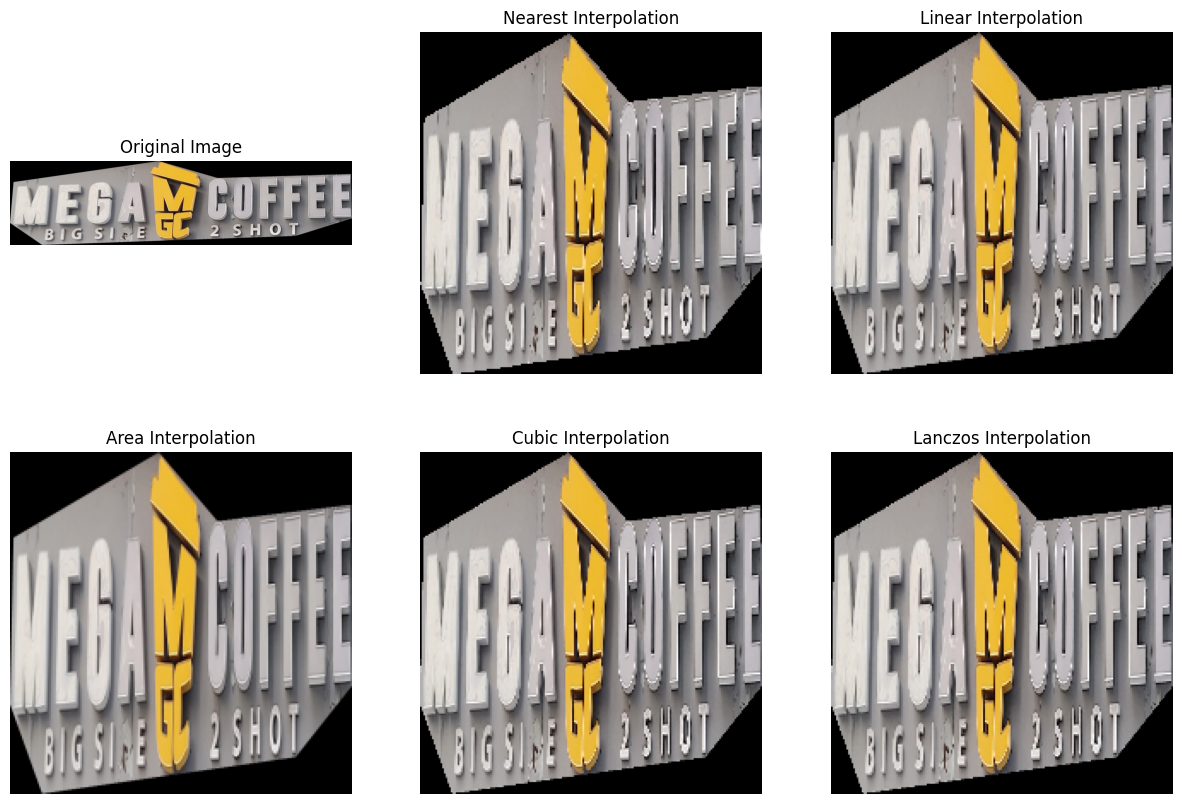

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/home/datasets/det_signboard1/1/94.png")

nearest_img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_NEAREST)
linear_img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LINEAR)
area_img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_AREA)
cubic_img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_CUBIC)
lanczos_img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LANCZOS4)

# 다양한 보간 방법으로 리사이즈된 이미지 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Nearest Interpolation")
plt.imshow(cv2.cvtColor(nearest_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Linear Interpolation")
plt.imshow(cv2.cvtColor(linear_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Area Interpolation")
plt.imshow(cv2.cvtColor(area_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Cubic Interpolation")
plt.imshow(cv2.cvtColor(cubic_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Lanczos Interpolation")
plt.imshow(cv2.cvtColor(lanczos_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

(561, 2308, 3)


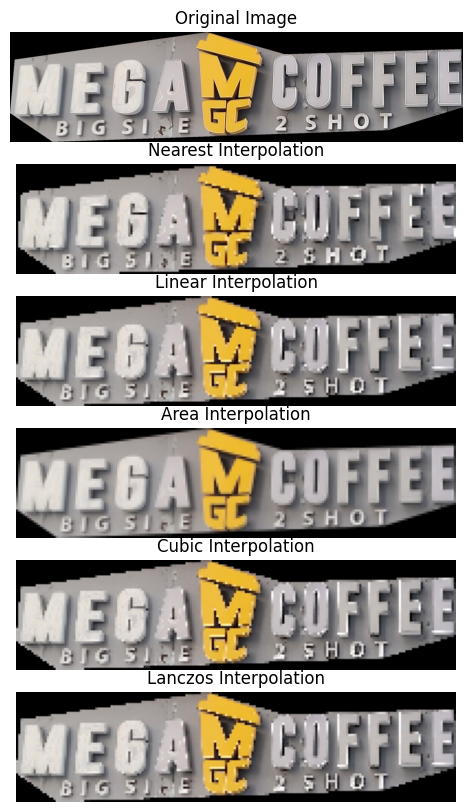

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/home/datasets/det_signboard1/1/94.png")
print(img.shape)
shape = (200, 50)
nearest_img = cv2.resize(img, shape, interpolation=cv2.INTER_NEAREST)
linear_img = cv2.resize(img, shape, interpolation=cv2.INTER_LINEAR)
area_img = cv2.resize(img, shape, interpolation=cv2.INTER_AREA)
cubic_img = cv2.resize(img, shape, interpolation=cv2.INTER_CUBIC)
lanczos_img = cv2.resize(img, shape, interpolation=cv2.INTER_LANCZOS4)

# 다양한 보간 방법으로 리사이즈된 이미지 시각화
plt.figure(figsize=(15, 10))

plt.subplot(6, 1, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 2)
plt.title("Nearest Interpolation")
plt.imshow(cv2.cvtColor(nearest_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 3)
plt.title("Linear Interpolation")
plt.imshow(cv2.cvtColor(linear_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 4)
plt.title("Area Interpolation")
plt.imshow(cv2.cvtColor(area_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 5)
plt.title("Cubic Interpolation")
plt.imshow(cv2.cvtColor(cubic_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 6)
plt.title("Lanczos Interpolation")
plt.imshow(cv2.cvtColor(lanczos_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

(15, 24, 3)


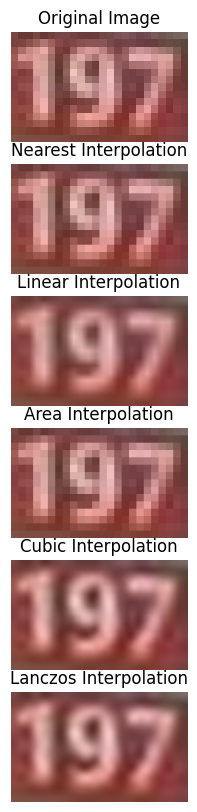

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/home/datasets/rec_ic15/ch4_test_word_images_gt/word_4.png")
print(img.shape)
h, w, c = img.shape
n = 10
shape = (w*n, h*n)
nearest_img = cv2.resize(img, shape, interpolation=cv2.INTER_NEAREST)
linear_img = cv2.resize(img, shape, interpolation=cv2.INTER_LINEAR)
area_img = cv2.resize(img, shape, interpolation=cv2.INTER_AREA)
cubic_img = cv2.resize(img, shape, interpolation=cv2.INTER_CUBIC)
lanczos_img = cv2.resize(img, shape, interpolation=cv2.INTER_LANCZOS4)

# 다양한 보간 방법으로 리사이즈된 이미지 시각화
plt.figure(figsize=(15, 10))

plt.subplot(6, 1, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 2)
plt.title("Nearest Interpolation")
plt.imshow(cv2.cvtColor(nearest_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 3)
plt.title("Linear Interpolation")
plt.imshow(cv2.cvtColor(linear_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 4)
plt.title("Area Interpolation")
plt.imshow(cv2.cvtColor(area_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 5)
plt.title("Cubic Interpolation")
plt.imshow(cv2.cvtColor(cubic_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 6)
plt.title("Lanczos Interpolation")
plt.imshow(cv2.cvtColor(lanczos_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [21]:
x = "abc"
x[1] == "ab"


False

In [4]:
x = ["abb", "sdgag3w2"]
"".join(x)


'abbsdgag3w2'

In [11]:
from database import *
workdb = WorkDB()
df =workdb.get_report_df("rec_test")
print(df.columns)
df[["work_id", "version", "task", "G|Character|Acc|X", "C|Character|Acc|X"]]


Index(['work_id', 'version', 'task', 'C|Character|Acc|X',
       'C|Character|C_NED|X', 'C|Character|G_NED|X', 'C|Character|Acc|O',
       'C|Character|C_NED|O', 'C|Character|G_NED|O', 'G|Initial|Acc|X',
       'G|Initial|C_NED|X', 'G|Initial|Acc|O', 'G|Initial|C_NED|O',
       'G|Medial|Acc|X', 'G|Medial|C_NED|X', 'G|Medial|Acc|O',
       'G|Medial|C_NED|O', 'G|Final|Acc|X', 'G|Final|C_NED|X', 'G|Final|Acc|O',
       'G|Final|C_NED|O', 'G|Character|Acc|X', 'G|Character|C_NED|X',
       'G|Character|G_NED|X', 'G|Character|Acc|O', 'G|Character|C_NED|O',
       'G|Character|G_NED|O', 'fps'],
      dtype='object')


,work_id,version,task,G|Character|Acc|X,C|Character|Acc|X
0,rec_test,10.0,eval,0.946721,0.961066
0,rec_test,20.0,eval,0.954918,0.969262
0,rec_test,10.0,train,0.962500,0.971875
0,rec_test,20.0,train,0.962500,0.971875
0,rec_test,10.0,test,0.944672,0.959016
0,rec_test,20.0,test,0.956967,0.961066


In [2]:
x = ([1, 2, 3], [4, 5, 6])
for a, b in zip(x):
    print(a, b)

ValueError: not enough values to unpack (expected 2, got 1)